<a href="https://colab.research.google.com/github/nagomi1529/Prog2_11th/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

numpy

読み込んだ画像を90度回転させる関数

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


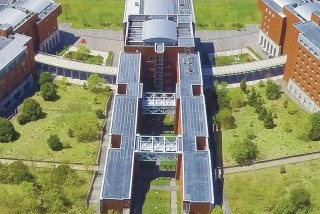

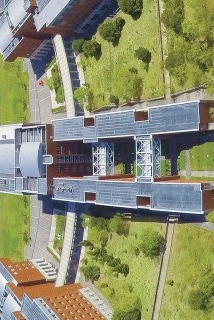

In [ ]:
import numpy as np
import cv2, sys
from google.colab.patches import cv2_imshow

img1 = cv2.imread('drive/MyDrive/ichidai.jpg')
if img1 is None:
  sys.exit('エラー: ファイルを開けませんでした')

def kaiten(img):
  h = img.shape[0]
  w = img.shape[1]
  array = np.zeros((3,h,w))
  for iy in range(h):
    for ix in range(w):
      array[2][iy][ix] = img[iy,ix][2]
      array[1][iy][ix] = img[iy,ix][1]
      array[0][iy][ix] = img[iy,ix][0]

  R = np.matrix(array[2])
  G = np.matrix(array[1])
  B = np.matrix(array[0])

  tR = np.transpose(R)
  tG = np.transpose(G)
  tB = np.transpose(B)

  arrayr = np.array(tR)
  arrayg = np.array(tG)
  arrayb = np.array(tB)

  img2 = np.zeros((w,h,3),np.uint8)
  for iy2 in range(w):
    for ix2 in range(h):
      img2[iy2,ix2][2] = arrayr[iy2][ix2]
      img2[iy2,ix2][1] = arrayg[iy2][ix2]
      img2[iy2,ix2][0] = arrayb[iy2][ix2]

  return img,img2

a,b = kaiten(img1)
cv2_imshow(a)
print()
cv2_imshow(b)